<a href="https://colab.research.google.com/github/Hemavati1/Hemavati1/blob/main/neural%20net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
n=int(input("enter n"))
t=n
sum=0
while(n!=0):
  d=n%10
  sum=sum*10+d
  n=n//10
print(sum)

enter n22
22


In [100]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()
dataset.columns
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]
print(y)
#create dummy variables
geography=pd.get_dummies(X["Geography"], drop_first=True)
gender=pd.get_dummies(X["Gender"], drop_first=True)

X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,  Y_test= train_test_split(X,y,test_size=0.2,random_state=0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#print(Y_test)

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#importing keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU,ELU
from keras.layers import Dropout

#initialize
classifier=Sequential()

#adding the input layer and first hidden layer
classifier.add(Dense(units= 6, activation ='relu', input_dim = 11))

#second hidden layer
classifier.add(Dense(units= 6, activation ='relu'))

#adding outputlayer
classifier.add(Dense(units=1, activation='sigmoid'))

#classifier.summary()
classifier.compile(optimizer='adamax', loss='binary_crossentropy', metrics = ['accuracy'])
print(Y_train)
model_history = classifier.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs=100)





dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


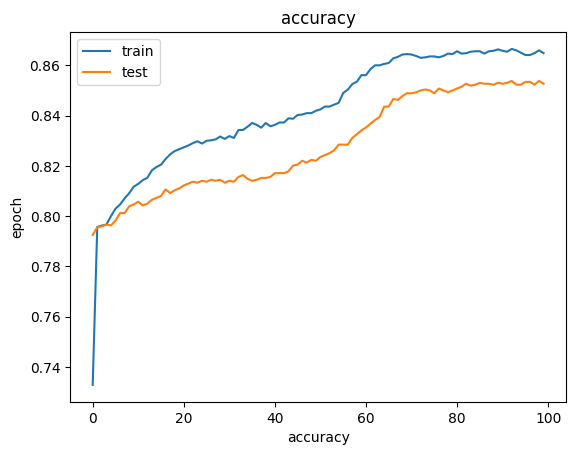

In [113]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [122]:

#predicting the result
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(Y_test,y_pred)
score=accuracy_score(y_pred,Y_test)
print(score)

63/63 [==============================] - 0s 6ms/step
0.8565
